# **Diabetis Classification Model**

In [89]:
#loading relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind # statistics library

#class imbalance
from collections import Counter
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#logistic regression model libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Random forest model
from sklearn.ensemble import RandomForestClassifier

# Gradient Boost Classifier
from xgboost import XGBClassifier




# **Load dataset from kaggle**

In [90]:
# Search for datasets related to diabetes
!kaggle datasets list -s "Ghanaian Diabetes dataset"
!kaggle datasets download -d devkyle/diabetes-dataset

import zipfile
import os

# Specify the name of the downloaded zip file
zip_file_name = 'diabetes-dataset.zip'

# Specify the directory to extract to (optional, defaults to current directory)
extract_dir = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory to find the CSV file name
print("Files extracted:")
print(os.listdir(extract_dir))

ref                       title                            size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------  -------------------------  ----------  --------------------------  -------------  ---------  ---------------  
devkyle/diabetes-dataset  Ghanaian Diabetes dataset       21759  2024-01-02 01:12:47.680000             86          0  0.3529412        
Dataset URL: https://www.kaggle.com/datasets/devkyle/diabetes-dataset
License(s): MIT
diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Files extracted:
['.config', 'Diabetes (1).csv', 'diabetes-dataset.zip', '.gradio', 'kaggle.json', 'sample_data']


In [91]:
db=pd.read_csv("/content/Diabetes (1).csv")

# **Examing the Dataset**

In [92]:
db.shape

(3415, 14)

In [93]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,F,7.0,6.7,True,True,True,False,False,False,False,False,31.0,positive
1,57,M,10.8,8.0,False,False,False,False,False,False,False,False,32.0,positive
2,56,F,3.6,5.0,False,False,False,False,False,False,False,False,23.0,negative


In [94]:
#checking dimension of the dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          3415 non-null   int64  
 1   Gender       3414 non-null   object 
 2   FPG          3415 non-null   float64
 3   HbA1c        3415 non-null   float64
 4   Nocturia     3415 non-null   bool   
 5   Polyuria     3415 non-null   bool   
 6   Weight_loss  3415 non-null   bool   
 7   Vomiting     3415 non-null   bool   
 8   Nausea       3415 non-null   bool   
 9   Polydipsia   3415 non-null   bool   
 10  Polyphagia   3415 non-null   bool   
 11  Headache     3415 non-null   bool   
 12  BMI          3408 non-null   float64
 13  Outcome      3415 non-null   object 
dtypes: bool(8), float64(3), int64(1), object(2)
memory usage: 186.9+ KB


In [95]:
#checking for empty cell
db.isnull().sum().sum()

np.int64(8)

In [96]:
#check for duplicate
db.duplicated().sum()

np.int64(459)

# **Data Prepocessing**

In [97]:
#droping duplicate
db = db.drop_duplicates()

In [98]:
db.duplicated().sum()

np.int64(0)

In [99]:
db.shape

(2956, 14)

In [100]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 3414
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          2956 non-null   int64  
 1   Gender       2955 non-null   object 
 2   FPG          2956 non-null   float64
 3   HbA1c        2956 non-null   float64
 4   Nocturia     2956 non-null   bool   
 5   Polyuria     2956 non-null   bool   
 6   Weight_loss  2956 non-null   bool   
 7   Vomiting     2956 non-null   bool   
 8   Nausea       2956 non-null   bool   
 9   Polydipsia   2956 non-null   bool   
 10  Polyphagia   2956 non-null   bool   
 11  Headache     2956 non-null   bool   
 12  BMI          2949 non-null   float64
 13  Outcome      2956 non-null   object 
dtypes: bool(8), float64(3), int64(1), object(2)
memory usage: 184.8+ KB


In [101]:
#Fixing missing values
db["BMI"].fillna(db["BMI"].mean(), inplace=True)

/tmp/ipython-input-3720150999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db["BMI"].fillna(db["BMI"].mean(), inplace=True)


In [102]:
db.isnull().sum()

,0
AGE,0
Gender,1
FPG,0
HbA1c,0
Nocturia,0
Polyuria,0
Weight_loss,0
Vomiting,0
Nausea,0
Polydipsia,0


# **Exploratory Data Analysis (EDA)**

/tmp/ipython-input-3030133106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=db, palette='Set2')


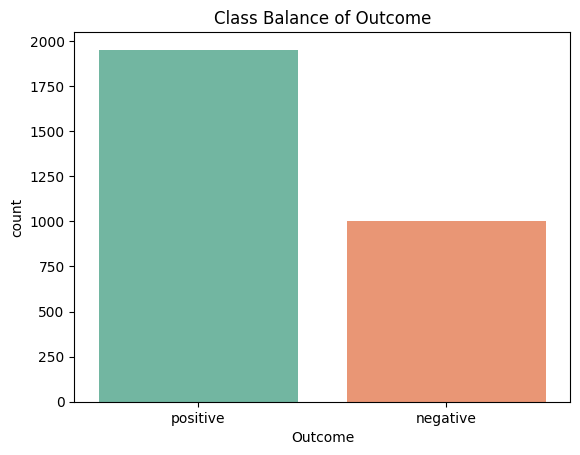

Outcome
positive    1952
negative    1004
Name: count, dtype: int64
Outcome
positive    66.035183
negative    33.964817
Name: proportion, dtype: float64


In [103]:
# examing output rate diabetis vs non-diabetis
sns.countplot(x='Outcome', data=db, palette='Set2')
plt.title("Class Balance of Outcome")
plt.show()

# Numbers
print(db['Outcome'].value_counts())
print(db['Outcome'].value_counts(normalize=True) * 100)

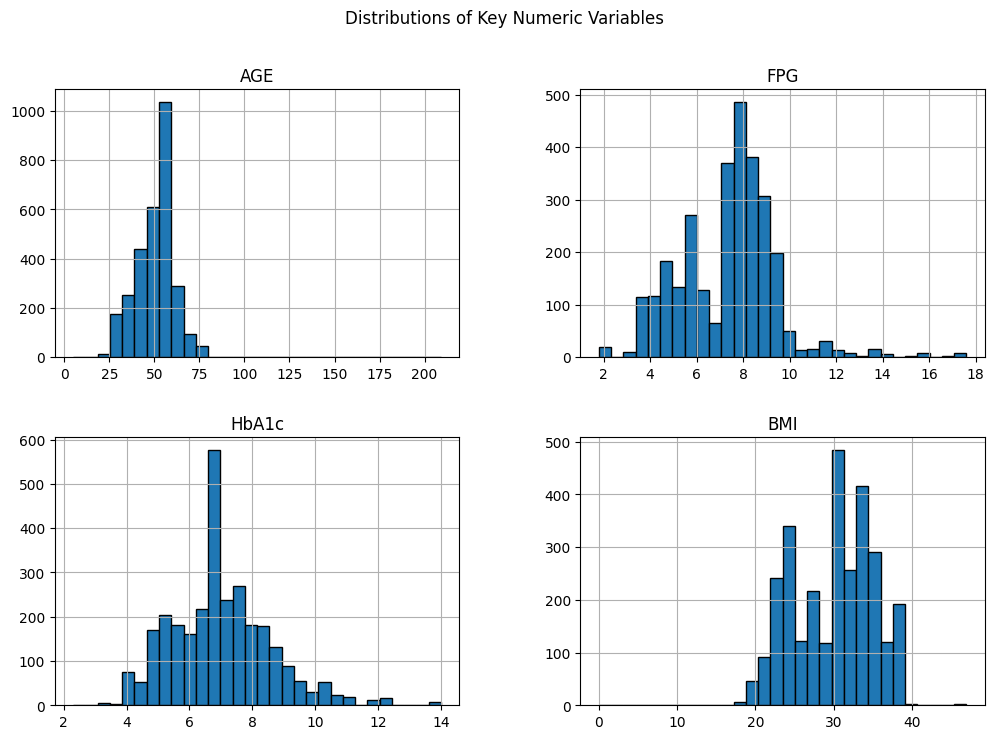

In [104]:
#checking the distribution of the key variables
key_variables = ['AGE', 'FPG', 'HbA1c', 'BMI']

db[key_variables].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle("Distributions of Key Numeric Variables")
plt.show()

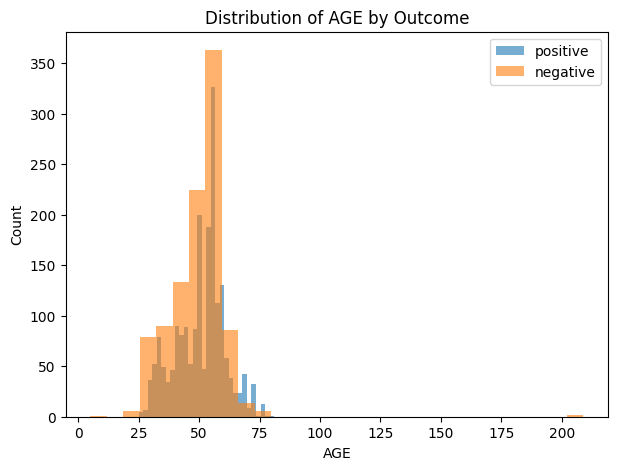

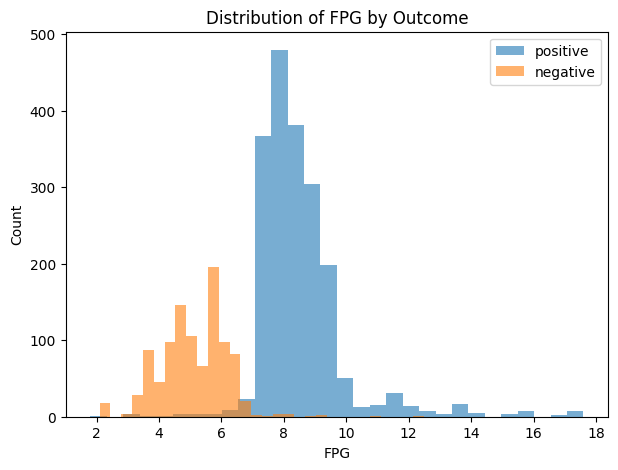

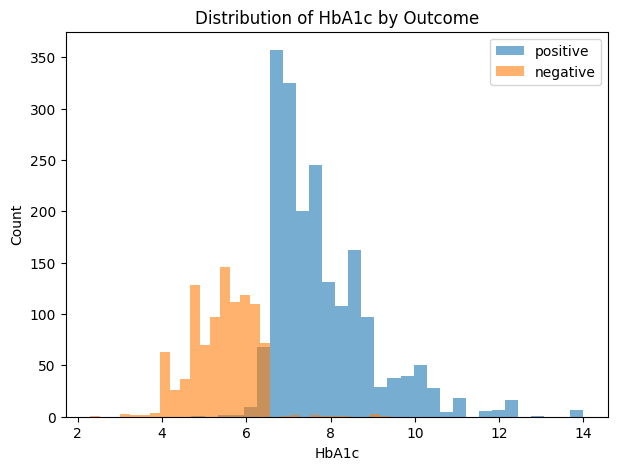

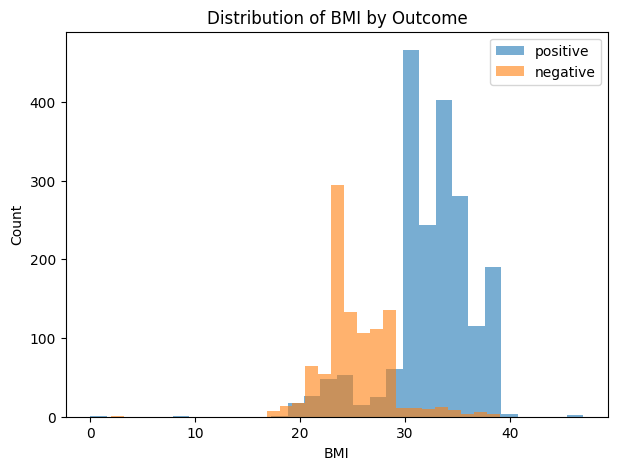

In [105]:
# distribution of key variables agains outcome
key_variables = ["AGE", "FPG", "HbA1c", "BMI"]

# Plot distributions by Outcome
for var in key_variables:
    plt.figure(figsize=(7,5))
    for outcome in db["Outcome"].unique():
        subset = db[db["Outcome"] == outcome]
        plt.hist(subset[var].dropna(), bins=30, alpha=0.6, label=outcome)
    plt.title(f"Distribution of {var} by Outcome")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

                AGE       FPG     HbA1c        BMI
Outcome                                           
negative  49.373506  5.124701  5.422610  25.225299
positive  50.786373  8.481286  7.813023  32.508701


/tmp/ipython-input-1483907712.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')
/tmp/ipython-input-1483907712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')


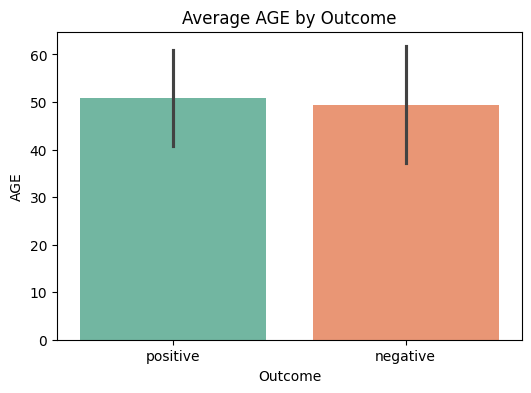

/tmp/ipython-input-1483907712.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')
/tmp/ipython-input-1483907712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')


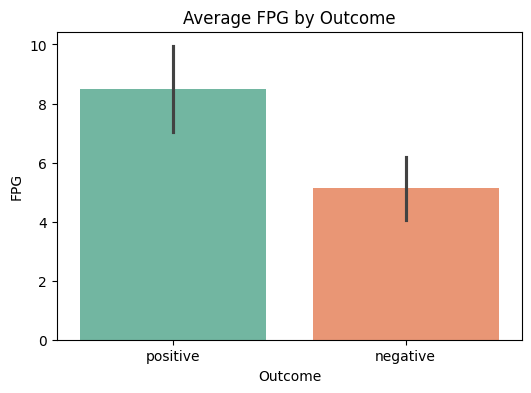

/tmp/ipython-input-1483907712.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')
/tmp/ipython-input-1483907712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')


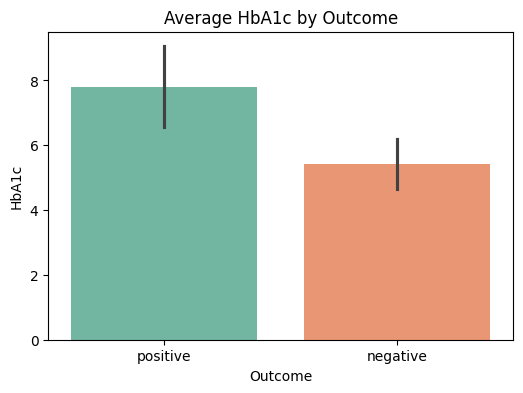

/tmp/ipython-input-1483907712.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')
/tmp/ipython-input-1483907712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')


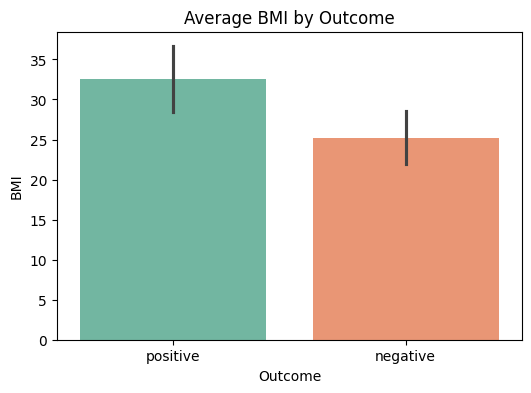

In [106]:
# Group the outcome by the key variables and calculate mean
group_means = db.groupby('Outcome')[['AGE', 'FPG', 'HbA1c', 'BMI']].mean()
print(group_means)

# Visualize with barplots
key_variables = ["AGE", "FPG", "HbA1c", "BMI"]
for col in key_variables:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Outcome', y=col, data=db, ci='sd', palette='Set2')
    plt.title(f"Average {col} by Outcome")
    plt.show()

In [107]:

# Variables to test
key_variables = ["AGE", "FPG", "HbA1c", "BMI"]

# Split data by outcome
group_neg = db[db["Outcome"] == "negative"]
group_pos = db[db["Outcome"] == "positive"]

# Run t-tests
for var in key_variables:
    stat, p = ttest_ind(group_neg[var], group_pos[var])
    print(f"{var}: t-stat={stat:.3f}, p-value={p:.5f}")
    if p < 0.05:
        print(f"  ✅ Significant difference in {var} between groups.\n")
    else:
        print(f"  ❌ No significant difference in {var} between groups.\n")


AGE: t-stat=-3.329, p-value=0.00088
  ✅ Significant difference in AGE between groups.

FPG: t-stat=-64.601, p-value=0.00000
  ✅ Significant difference in FPG between groups.

HbA1c: t-stat=-55.976, p-value=0.00000
  ✅ Significant difference in HbA1c between groups.

BMI: t-stat=-48.674, p-value=0.00000
  ✅ Significant difference in BMI between groups.



In [108]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,F,7.0,6.7,True,True,True,False,False,False,False,False,31.0,positive
1,57,M,10.8,8.0,False,False,False,False,False,False,False,False,32.0,positive
2,56,F,3.6,5.0,False,False,False,False,False,False,False,False,23.0,negative


In [109]:
# Convert all boolean columns to 0/1
bool_cols = db.select_dtypes(include=['bool']).columns
db[bool_cols] = db[bool_cols].astype(int)



In [110]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,F,7.0,6.7,1,1,1,0,0,0,0,0,31.0,positive
1,57,M,10.8,8.0,0,0,0,0,0,0,0,0,32.0,positive
2,56,F,3.6,5.0,0,0,0,0,0,0,0,0,23.0,negative


In [111]:
db["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [112]:
# Map Gende as  F -> 0, M -> 1
db["Gender"] = db["Gender"].map({"F": 0, "M": 1})

# If mode exists,
if not db["Gender"].mode().empty:
    db["Gender"] = db["Gender"].fillna(db["Gender"].mode().iloc[0])
else:
    db["Gender"] = db["Gender"].fillna(0)  # fallback

# Convert to integer
db["Gender"] = db["Gender"].astype(int)


In [113]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,0,7.0,6.7,1,1,1,0,0,0,0,0,31.0,positive
1,57,1,10.8,8.0,0,0,0,0,0,0,0,0,32.0,positive
2,56,0,3.6,5.0,0,0,0,0,0,0,0,0,23.0,negative


In [114]:
db["Outcome"].unique()

array(['positive', 'negative'], dtype=object)

In [115]:
#mapping outcome to 0/1
db["Outcome"]=db["Outcome"].map({"positive": 1, "negative": 0}).astype(int)

In [116]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,0,7.0,6.7,1,1,1,0,0,0,0,0,31.0,1
1,57,1,10.8,8.0,0,0,0,0,0,0,0,0,32.0,1
2,56,0,3.6,5.0,0,0,0,0,0,0,0,0,23.0,0


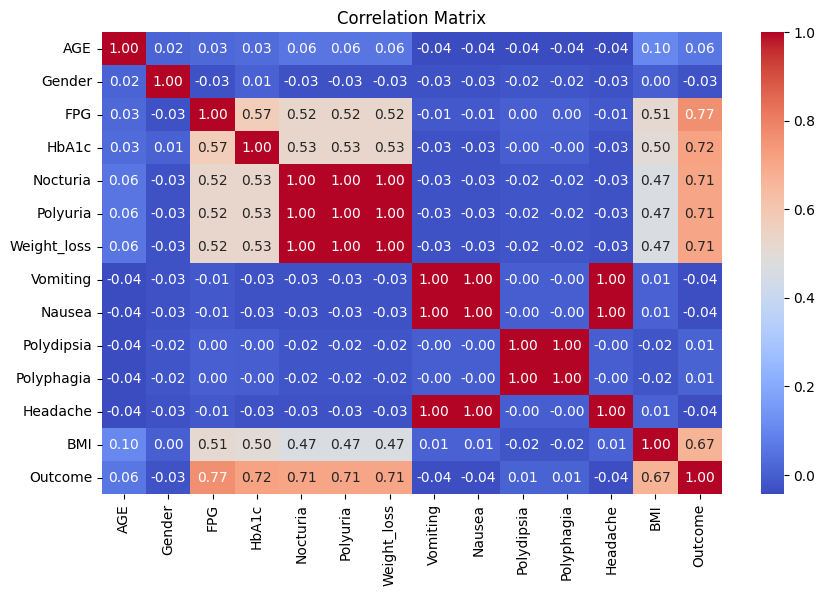

In [117]:
#checking for correlation
# Correlation matrix
corr = db.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

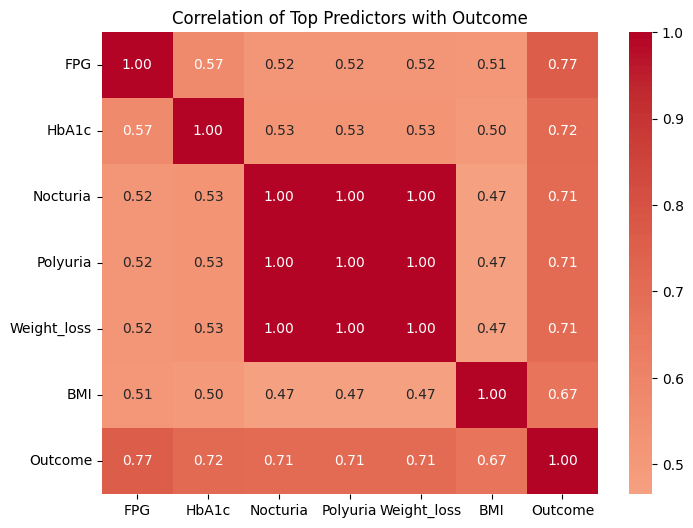

/tmp/ipython-input-122332651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=feature, data=db, palette="Set2")
/tmp/ipython-input-122332651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=feature, data=db, palette="Set2")
/tmp/ipython-input-122332651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=feature, data=db, palette="Set2")


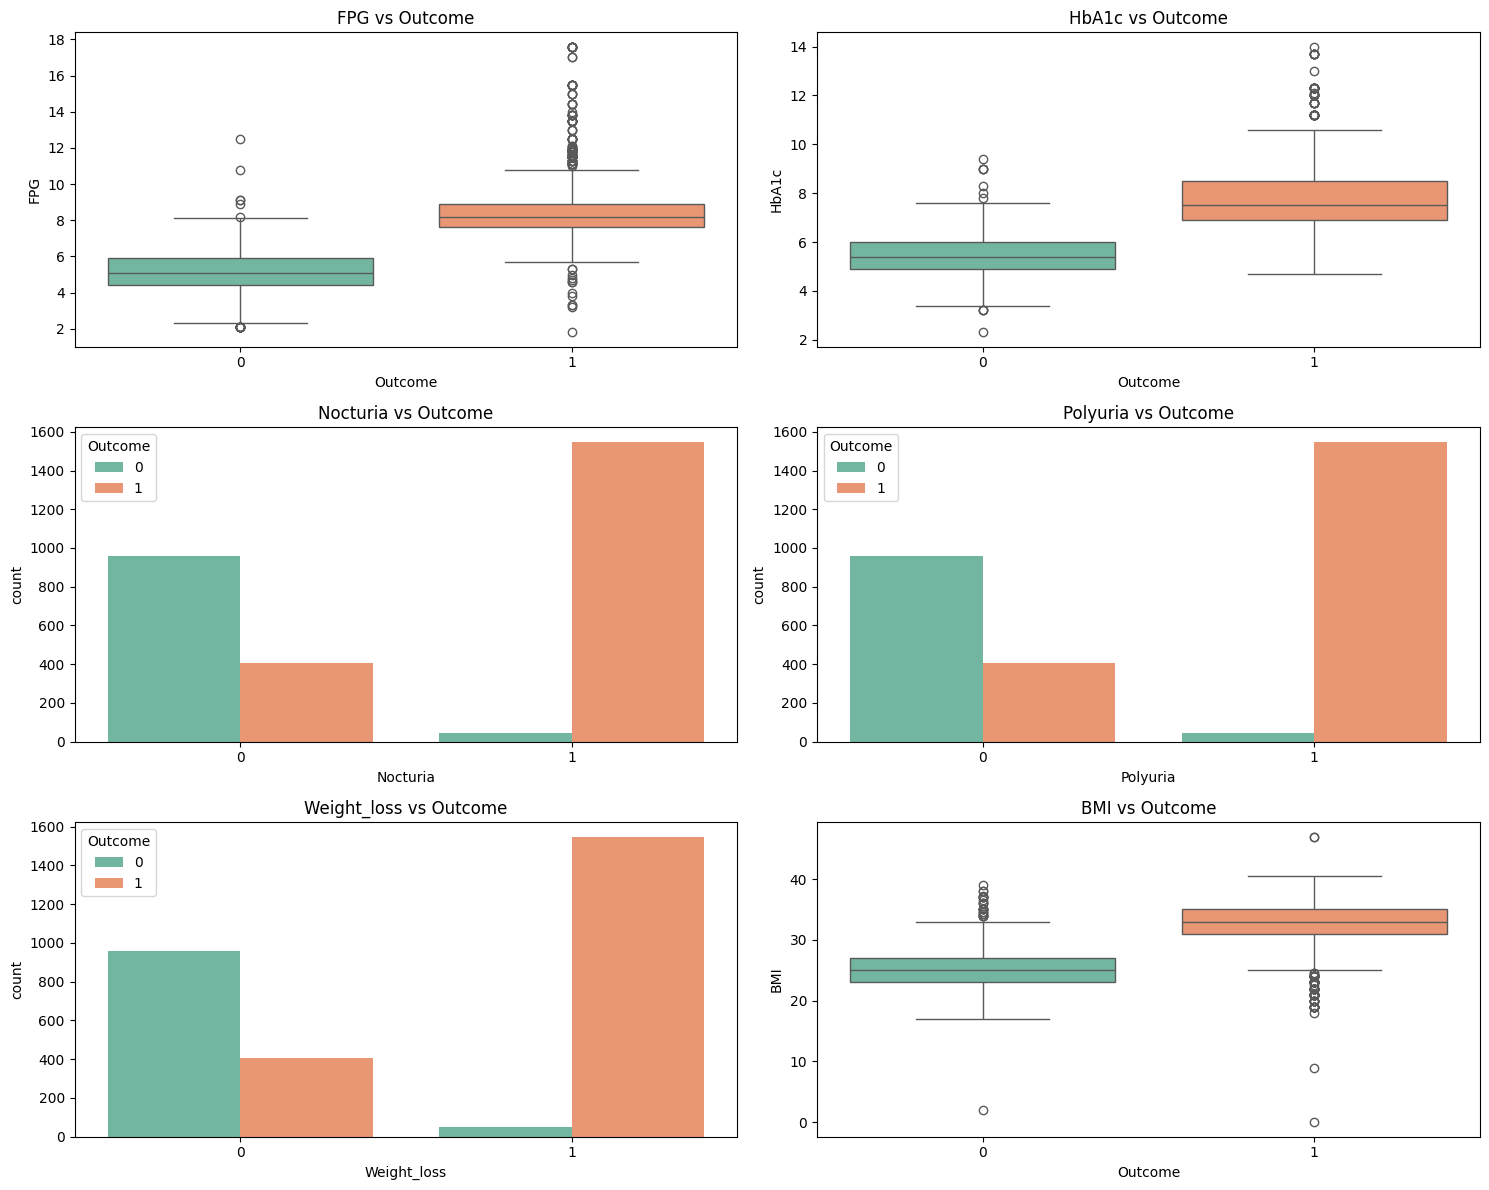

In [118]:
# Now pridictors has been identified
top_features = ["FPG", "HbA1c", "Nocturia", "Polyuria", "Weight_loss", "BMI", "Outcome"]

plt.figure(figsize=(8, 6))
sns.heatmap(db[top_features].corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")

plt.title("Correlation of Top Predictors with Outcome")
plt.show()

# viewing the distribution of the top predictors vs outcome
predictors = ["FPG", "HbA1c", "Nocturia", "Polyuria", "Weight_loss", "BMI"]

plt.figure(figsize=(15, 12))
for i, feature in enumerate(predictors, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 cols grid
    if db[feature].nunique() > 5:
        # Continuous variables -> boxplot
        sns.boxplot(x="Outcome", y=feature, data=db, palette="Set2")
    else:
        # Categorical/binary variables -> countplot
        sns.countplot(x=feature, hue="Outcome", data=db, palette="Set2")

    plt.title(f"{feature} vs Outcome")

plt.tight_layout()
plt.show()


In [119]:
db.head(3)

,AGE,Gender,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,Vomiting,Nausea,Polydipsia,Polyphagia,Headache,BMI,Outcome
0,52,0,7.0,6.7,1,1,1,0,0,0,0,0,31.0,1
1,57,1,10.8,8.0,0,0,0,0,0,0,0,0,32.0,1
2,56,0,3.6,5.0,0,0,0,0,0,0,0,0,23.0,0


# **Balancing the Outcome variable class**

In [120]:
# Separate majority and minority classes
db_majority = db[db.Outcome==0]
db_minority = db[db.Outcome==1]

# Upsample minority class
db_minority_upsampled = resample(db_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(db_majority),    # to match majority class
                                 random_state=123) # for reproducible results

# Combine majority class with upsampled minority class
db_balanced = pd.concat([db_majority, db_minority_upsampled])

# Display new class counts
print(db_balanced.Outcome.value_counts())

Outcome
0    1004
1    1004
Name: count, dtype: int64


In [121]:
db_balanced.shape

(2008, 14)

In [122]:
db.shape

(2956, 14)

In [123]:
#Increase minority class
# --- Separate majority and minority ---
majority = db[db["Outcome"] == 1]   # majority class
minority = db[db["Outcome"] == 0]   # minority class

print("Before oversampling:", Counter(db["Outcome"]))

# --- Oversample minority to match majority ---
minority_oversampled = resample(minority,
                                replace=True,          # sample with replacement
                                n_samples=len(majority), # match majority size
                                random_state=42)

# --- Combine back ---
db_bal  = pd.concat([majority, minority_oversampled])

print("After oversampling:", Counter(db_bal["Outcome"]))

Before oversampling: Counter({1: 1952, 0: 1004})
After oversampling: Counter({1: 1952, 0: 1952})


In [124]:
db_bal.shape

(3904, 14)

# **Future Engineering (Selecting feature and target variables)**

In [125]:
features = ["FPG", "HbA1c", "Nocturia", "Polyuria",
            "Weight_loss", "BMI","AGE","Gender"]
target = "Outcome"

X= db_bal[features]
Y = db_bal[target]

In [126]:
X.head(3)

,FPG,HbA1c,Nocturia,Polyuria,Weight_loss,BMI,AGE,Gender
0,7.0,6.7,1,1,1,31.0,52,0
1,10.8,8.0,0,0,0,32.0,57,1
3,7.5,6.8,0,0,0,31.0,32,0


In [127]:
Y.head(3)

,Outcome
0,1
1,1
3,1


In [128]:
X.shape

(3904, 8)

In [129]:
Y.shape

(3904,)

# **Splitting the Datasets**

In [130]:
split = int(len(X)*0.7)
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [131]:
X_train.shape

(2732, 8)

In [132]:
X_test.shape

(1172, 8)

In [133]:
Y_test.unique()

array([0])

# **Modelling**

In [134]:
# Feature Scaling, Standardizing the variables

scaler = StandardScaler()

# Fit only on training data, then transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [135]:
#Creating the model
logReg_Model = LogisticRegression(max_iter=1000, random_state=42)


In [136]:
#fitting the model with train dataset
logReg_Model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [137]:
# Predictions

pred = logReg_Model.predict(X_test_scaled)
y_prob = logReg_Model.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC-AUC


In [138]:
# Evaluation

print("Confusion Matrix:")
print(confusion_matrix(Y_test, pred))

print("\nClassification Report:")
print(classification_report(Y_test, pred))

print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob))

Confusion Matrix:
[[1151   21]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1172
           1       0.00      0.00      0.00         0

    accuracy                           0.98      1172
   macro avg       0.50      0.49      0.50      1172
weighted avg       1.00      0.98      0.99      1172

ROC-AUC Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: 

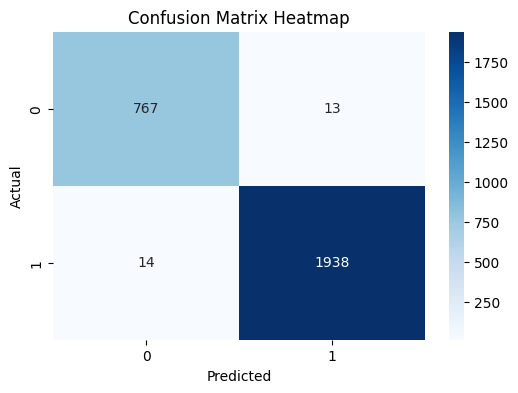

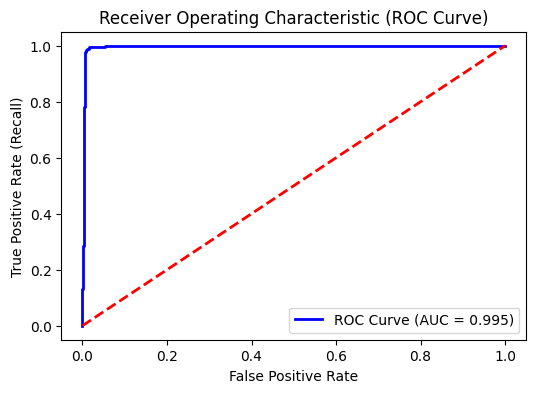

In [139]:
#  Confusion Matrix Heatmap on train dataset
pred_on_train = logReg_Model.predict(X_train_scaled)
y_prob_train = logReg_Model.predict_proba(X_train_scaled)[:, 1]  # probabilities for ROC-AUC

cm = confusion_matrix(Y_train, pred_on_train)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

#  ROC Curve
y_prob = logReg_Model.predict_proba(X_train_scaled)[:,1]  # probability for class 1

fpr, tpr, thresholds = roc_curve(Y_train, y_prob_train)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC Curve (AUC = %0.3f)" % roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()

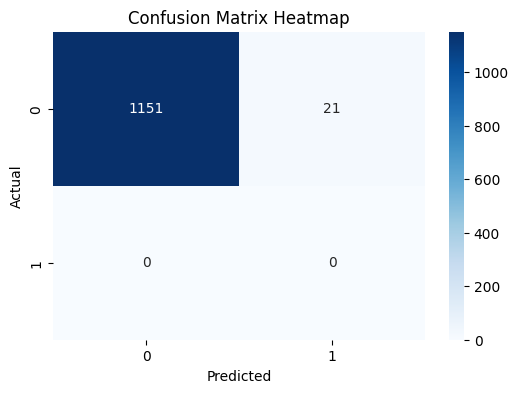

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


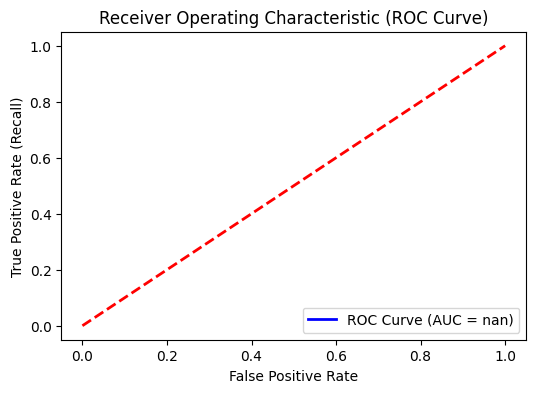

In [140]:
#  Confusion Matrix Heatmap
cm = confusion_matrix(Y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

#  ROC Curve
y_prob = logReg_Model.predict_proba(X_test_scaled)[:,1]  # probability for class 1

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC Curve (AUC = %0.3f)" % roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.show()

This model is currently given a scew prediction. it is favoring one class than the other. it is due to oversampling method adopted.

In [141]:
db.shape

(2956, 14)

In [142]:
# Now let split the dataset into trainig and test data before balancing the trainig set alone
feat = ["FPG", "HbA1c", "Nocturia", "Polyuria","Weight_loss", "BMI","AGE","Gender"]
targ = "Outcome"

x= db[feat]
y = db[targ]


# Split into train/test (70/30 for example)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

print("Before SMOTE, counts in training set:", Counter(y_train))

# Apply SMOTE only on training set(for balancing)
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("After SMOTE, counts in training set:", Counter(y_train_res))
print("Test set distribution:", Counter(y_test))

# Scale data (fit only on training, transform both train & test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test)

# Train Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(x_train_scaled, y_train_res)

# Evaluate
y_pred = log_reg_model.predict(x_test_scaled)



print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_model.predict_proba(x_test_scaled)[:,1]))


Before SMOTE, counts in training set: Counter({1: 1366, 0: 703})
After SMOTE, counts in training set: Counter({0: 1366, 1: 1366})
Test set distribution: Counter({1: 586, 0: 301})
Confusion Matrix:
[[296   5]
 [  4 582]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       301
           1       0.99      0.99      0.99       586

    accuracy                           0.99       887
   macro avg       0.99      0.99      0.99       887
weighted avg       0.99      0.99      0.99       887

ROC-AUC Score: 0.9954191375732767


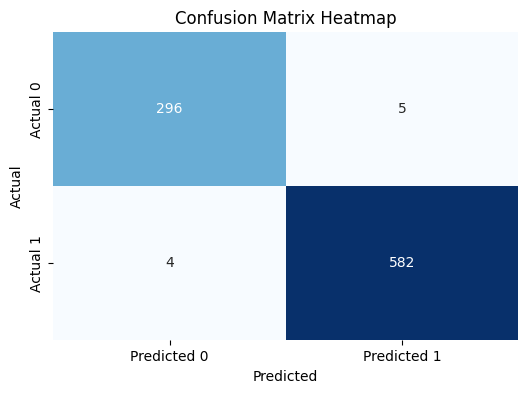

In [143]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Now, this is giving a reasonable prediction after balacing the minority class in the trainig data with the majority class. this model could now be rely on. before conclusion, let try other models and compare their performances to determine which models does it better.

# **Random Forest Model**

In [144]:
#  Train Random Forest
random_forest_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
)
#fit model with training data
random_forest_model.fit(x_train_res, y_train_res)

# Predict
y_pred_rf = random_forest_model.predict(x_test)

# 3. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, random_forest_model.predict_proba(x_test)[:,1]))

Confusion Matrix:
[[298   3]
 [  3 583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       301
           1       0.99      0.99      0.99       586

    accuracy                           0.99       887
   macro avg       0.99      0.99      0.99       887
weighted avg       0.99      0.99      0.99       887

ROC-AUC Score: 0.9997193654825214


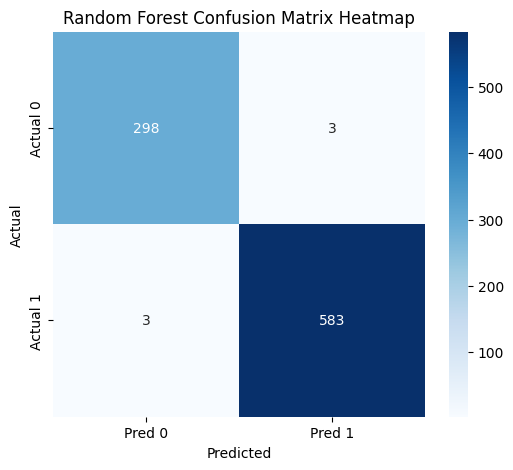

In [145]:
#  Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Random Forest Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


/tmp/ipython-input-649656050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


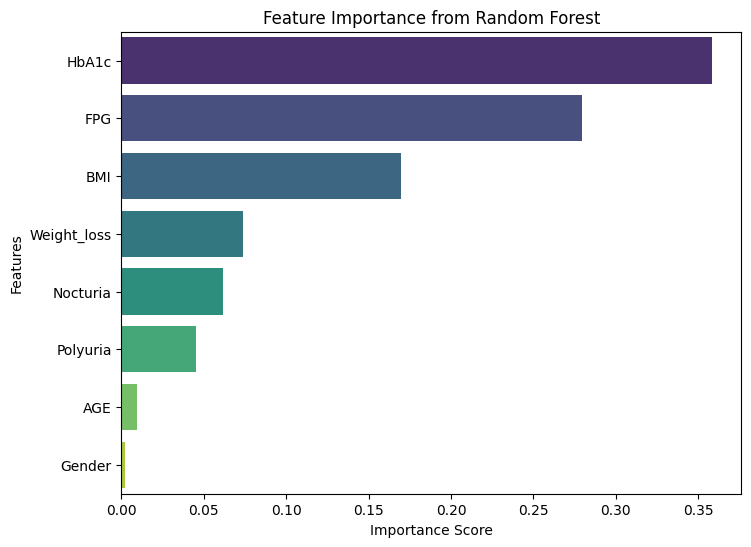

In [146]:
# Feature Importance Plot
importances = random_forest_model.feature_importances_
features = x.columns  # assuming X is your feature DataFrame
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# **XGBoost Model(Gradient Boost Model)**

In [147]:
# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# fit the model
xgb_model.fit(x_train_scaled, y_train_res)

# Predictions
y_pred_xgb = xgb_model.predict(x_test_scaled)
y_proba_xgb = xgb_model.predict_proba(x_test_scaled)[:,1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Confusion Matrix:
[[299   2]
 [  4 582]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       301
           1       1.00      0.99      0.99       586

    accuracy                           0.99       887
   macro avg       0.99      0.99      0.99       887
weighted avg       0.99      0.99      0.99       887

ROC-AUC Score: 0.9989795108455318


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:22:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


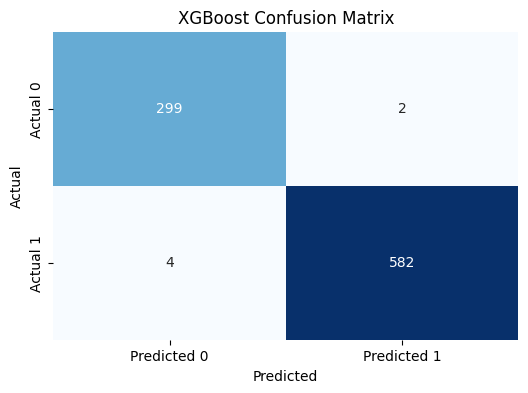

In [148]:
# --- Visualization ---
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0","Predicted 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.title("XGBoost Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



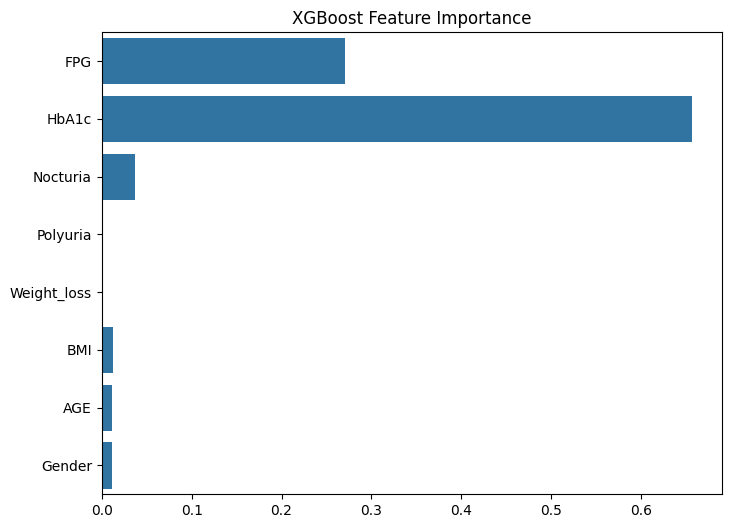

In [149]:
# Feature Importance
plt.figure(figsize=(8,6))
sns.barplot(x=xgb_model.feature_importances_, y=feat)
plt.title("XGBoost Feature Importance")
plt.show()

# **Model Comparison**
Let compare the performnce of the three models

In [150]:
# Gather performance metrics from previous outputs
# (Assuming the metrics are available in variables from previous cell executions)

# Logistic Regression metrics
lr_cm = confusion_matrix(y_test, y_pred)
lr_report = classification_report(y_test, y_pred, output_dict=True)
lr_roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(x_test_scaled)[:,1])

# Random Forest metrics
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(x_test)[:,1])


# XGBoost metrics
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test_scaled)[:,1])

# Create a dictionary to store the metrics
comparison_data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [lr_report['accuracy'], rf_report['accuracy'], xgb_report['accuracy']],
    "Precision (Negative)": [lr_report['0']['precision'], rf_report['0']['precision'], xgb_report['0']['precision']],
    "Recall (Negative)": [lr_report['0']['recall'], rf_report['0']['recall'], xgb_report['0']['recall']],
    "F1-Score (Negative)": [lr_report['0']['f1-score'], rf_report['0']['f1-score'], xgb_report['0']['f1-score']],
    "Precision (Positive)": [lr_report['1']['precision'], rf_report['1']['precision'], xgb_report['1']['precision']],
    "Recall (Positive)": [lr_report['1']['recall'], rf_report['1']['recall'], xgb_report['1']['recall']],
    "F1-Score (Positive)": [lr_report['1']['f1-score'], rf_report['1']['f1-score'], xgb_report['1']['f1-score']],
    "ROC-AUC Score": [lr_roc_auc, rf_roc_auc, xgb_roc_auc]
}

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
display(comparison_df)

,Model,Accuracy,Precision (Negative),Recall (Negative),F1-Score (Negative),Precision (Positive),Recall (Positive),F1-Score (Positive),ROC-AUC Score
0,Logistic Regression,0.989853,0.986667,0.983389,0.985025,0.991482,0.993174,0.992327,0.995419
1,Random Forest,0.993236,0.990033,0.990033,0.990033,0.994881,0.994881,0.994881,0.999719
2,XGBoost,0.993236,0.986799,0.993355,0.990066,0.996575,0.993174,0.994872,0.998980


In [153]:
import gradio as gr
import numpy as np

# Features used in training
feature_names = ["FPG", "HbA1c", "Nocturia", "Polyuria", "Weight Loss", "BMI", "Age", "Gender"]

def predict_diabetes(FPG, HbA1c, Nocturia, Polyuria, Weight_loss, BMI, Age, Gender):
    # Convert categorical inputs
    Nocturia = 1 if Nocturia == "Yes" else 0
    Polyuria = 1 if Polyuria == "Yes" else 0
    Weight_loss = 1 if Weight_loss == "Yes" else 0
    Gender = 1 if Gender == "Male" else 0

    # Create feature array
    features = np.array([[FPG, HbA1c, Nocturia, Polyuria, Weight_loss, BMI, Age, Gender]])
    features_scaled = scaler.transform(features)

    # Clinical override rules
    if HbA1c >= 6.5 or FPG >= 7.0:   # Adjust if your dataset is not mmol/L
        return {
            "Prediction": "Diabetic (Clinical Rule)",
            "Probability of Diabetes": 1.0,
            "Note": "Classified as diabetic due to medical thresholds (HbA1c ≥ 6.5% or FPG ≥ 7.0 mmol/L)."
        }

    # Otherwise, use the ML model
    prob = random_forest_model.predict_proba(features_scaled)[0][1]
    pred_class = "Diabetic" if prob >= 0.5 else "Non-Diabetic"

    return {
        "Prediction": pred_class,
        "Probability of Diabetes": float(prob),
        "Note": "Prediction made using ML model (Random Forest)."
    }

# Gradio inputs
inputs = [
    gr.Number(label="Fasting Plasma Glucose (FPG, mmol/L)"),
    gr.Number(label="HbA1c (Glycated Hemoglobin, %)"),
    gr.Radio(["No", "Yes"], label="Nocturia – Frequent urination at night"),
    gr.Radio(["No", "Yes"], label="Polyuria – Excessive urination"),
    gr.Radio(["No", "Yes"], label="Unexplained Weight Loss"),
    gr.Number(label="Body Mass Index (BMI) – Weight status indicator"),
    gr.Number(label="Age (Years)"),
    gr.Radio(["Female", "Male"], label="Gender")
]

output = gr.JSON(label="Prediction Result")

demo = gr.Interface(
    fn=predict_diabetes,
    inputs=inputs,
    outputs=output,
    title="Diabetes Prediction (Hybrid: Clinical + ML)",
    description="This model uses clinical thresholds (HbA1c ≥ 6.5%, FPG ≥ 7.0 mmol/L) as a safety override. If not triggered, the Random Forest ML model provides prediction."
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c68182add7fa0c9dc1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [154]:
import gradio as gr
import numpy as np

# Your features
feature_names = ["FPG", "HbA1c", "Nocturia", "Polyuria", "Weight_loss", "BMI", "AGE", "Gender"]

def predict_diabetes(FPG, HbA1c, Nocturia, Polyuria, Weight_loss, BMI, AGE, Gender):
    # Convert categorical inputs to numeric
    Nocturia = 1 if Nocturia == "Yes" else 0
    Polyuria = 1 if Polyuria == "Yes" else 0
    Weight_loss = 1 if Weight_loss == "Yes" else 0
    Gender = 1 if Gender == "Male" else 0

    # Combine into array
    features = np.array([[FPG, HbA1c, Nocturia, Polyuria, Weight_loss, BMI, AGE, Gender]])

    # Apply same scaling as training
    features_scaled = scaler.transform(features)

    # Predict
    prob = random_forest_model.predict_proba(features_scaled)[0][1]
    pred_class = "Diabetic" if prob >= 0.5 else "Non-Diabetic"

    return {
        "Prediction": pred_class,
        "Probability of Diabetes": round(float(prob), 3)
    }

# Inputs
inputs = [
    gr.Number(label="Fasting Plasma Glucose (FPG, mg/dL) – Blood sugar after fasting"),
    gr.Number(label="HbA1c (Glycated Hemoglobin, %) – Average 3-month blood sugar"),
    gr.Radio(["No", "Yes"], label="Nocturia – Frequent urination at night"),
    gr.Radio(["No", "Yes"], label="Polyuria – Excessive urination"),
    gr.Radio(["No", "Yes"], label="Unexplained Weight Loss"),
    gr.Number(label="Body Mass Index (BMI) – Weight status indicator"),
    gr.Number(label="Age (Years)"),
    gr.Radio(["Female", "Male"], label="Gender")
]

output = gr.JSON(label="Prediction Result")

demo = gr.Interface(
    fn=predict_diabetes,
    inputs=inputs,
    outputs=output,
    title="Diabetes Prediction with Random Forest"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eb2a291d7b9ad8c165.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
